# Gender classification by first name.

In [1]:
%tensorflow_version 2.x
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import random
%matplotlib inline

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
print(tf.__version__)

2.1.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Load dataset
names = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/capstone2/gender_classification/names.csv')
names['Name'] = names['Name'].str.strip()
names['Name'] = names['Name'].str.lower()
names['FirstLetter'] = names['FirstLetter'].str.lower()

In [5]:
names.head(5)

,Name,Gender,LastLetter,LastTwoLetter,FirstLetter
0,ashutosh,1,h,sh,a
1,meghamala,2,a,la,m
2,sahib,1,b,ib,s
3,pragya,2,a,ya,p
4,kranti,2,i,ti,k


# Naive Bayes on the last letter

In [0]:
last_letter = names.LastLetter.values

In [0]:
labels = names.Gender.values

In [0]:
def naive_bayes_classifier(features, labels):
  # Split the data into a training and test set.
  X_train, X_test, y_train, y_test = train_test_split(features.reshape(-1, 1), 
                                                      labels.reshape(-1, 1).ravel(), 
                                                      test_size = 0.3,
                                                      stratify = labels)

  encoder = OneHotEncoder(handle_unknown='ignore')
  X_train = encoder.fit_transform(X_train)
  X_test = encoder.transform(X_test)

  nb_clf = MultinomialNB()

  # Fit the model on the trainng data.
  nb_clf.fit(X_train, y_train)

  # Print the accuracy from the training data.
  print('The mean accuracy on the given train data and labels = ' + 
        str(nb_clf.score(X_train, y_train)))

  # Print the accuracy from the testing data.
  print('The mean accuracy on the given test data and labels = ' + 
        str(nb_clf.score(X_test, y_test)))

  print('Precision: %.3f' 
        %precision_score(y_true=y_test, y_pred=nb_clf.predict(X_test)))
  print('Recall: %.3f' 
        %recall_score(y_true=y_test, y_pred=nb_clf.predict(X_test)))
  print('F1: %.3f' 
        %f1_score(y_true=y_test, y_pred=nb_clf.predict(X_test)))

In [9]:
naive_bayes_classifier(last_letter, labels)

The mean accuracy on the given train data and labels = 0.8212052302444571
The mean accuracy on the given test data and labels = 0.8204108681245859
Precision: 0.889
Recall: 0.755
F1: 0.817


# Naive Bayes on the last two letters

In [0]:
last_two_letters = names.LastTwoLetter.values

In [11]:
naive_bayes_classifier(last_two_letters, labels)

The mean accuracy on the given train data and labels = 0.8399658897100626
The mean accuracy on the given test data and labels = 0.8177601060304838
Precision: 0.865
Recall: 0.777
F1: 0.819


# Naive Bayes on the first letter

In [0]:
first_letter = names.FirstLetter.values

In [13]:
naive_bayes_classifier(first_letter, labels)

The mean accuracy on the given train data and labels = 0.5523024445707788
The mean accuracy on the given test data and labels = 0.5559973492379059
Precision: 0.582
Recall: 0.571
F1: 0.576


# SVM on tfidf vectorized dataset

In [0]:
from sklearn.svm import SVC

def svm_classifier(df):

    labels = (df.Gender == 1).values.astype(np.int)
    features = df.Name

    # Split the data into a training and test set.
    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                        labels.reshape(-1, 1).ravel(), 
                                                        test_size = 0.3,
                                                        stratify = labels)

    vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', 
                                 ngram_range=(2, 3), 
                                 decode_error='ignore')
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)

    svm_clf = SVC()

    # Fit the model on the trainng data.
    svm_clf.fit(X_train, y_train)

    # Print the accuracy from the training data.
    print('The mean accuracy on the given train data and labels = ' + 
          str(svm_clf.score(X_train, y_train)))

    # Print the accuracy from the testing data.
    print('The mean accuracy on the given test data and labels = ' + 
          str(svm_clf.score(X_test, y_test)))
    print('Precision: %.3f' 
          %precision_score(y_true=y_test, 
                           y_pred=svm_clf.predict(X_test)))
    print('Recall: %.3f' 
          %recall_score(y_true=y_test, 
                        y_pred=svm_clf.predict(X_test)))
    print('F1: %.3f' 
          %f1_score(y_true=y_test, 
                    y_pred=svm_clf.predict(X_test)))

In [16]:
svm_classifier(names)

The mean accuracy on the given train data and labels = 0.9400227401932917
The mean accuracy on the given test data and labels = 0.7534791252485089
Precision: 0.740
Recall: 0.824
F1: 0.780


# Train-test split using TfidfVectorizer




In [0]:
def make_tfidf_train_test(df):   

    random.seed(1) 
    
    labels = (df.Gender == 1).values.astype(np.int)
    features = df.Name

    # Using train_test_split() to get train and test datasets from intitial dataset
    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                        labels.reshape(-1, 1).ravel(), 
                                                        test_size = 0.3,
                                                        stratify = labels)

    vectorizer = TfidfVectorizer(min_df=0.0, 
                                 analyzer='char', 
                                 ngram_range=(2, 3), 
                                 decode_error='ignore')
  
    X_train = vectorizer.fit_transform(X_train).toarray()
    X_test = vectorizer.transform(X_test).toarray()

    ds_train_valid = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    ds_train = ds_train_valid.take(int(0.7 * np.shape(X_train)[0]))
    ds_valid = ds_train_valid.skip(int(0.7 * np.shape(X_train)[0]))
    ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

    input_shape = np.shape(X_train)[1]
    ds_train_len = len(X_train)

    return ds_train, ds_valid, ds_test, input_shape    

In [0]:
tfidf_train_orig, tfidf_valid_orig, tfidf_test, tfidf_input_shape = make_tfidf_train_test(names)

# Train-test split using integer encoding

In [0]:
import string

def get_integer(x):
    chars = list(string.ascii_lowercase)
    ints = list(range(1,27))
    chars_ints_dict = dict(zip(chars, ints)) 

    return chars_ints_dict.get(x)   

In [0]:
def char2sequence_mapping(data):
    
    data['name_sequence'] = data['Name'].apply(lambda name: list( map(get_integer,name)))
    
    #Truncating length of names to length of 26
    rnn_data_features = np.array(pd.DataFrame(data.name_sequence.tolist()).fillna(0))
    rnn_data_features = rnn_data_features[:,:26]

    return rnn_data_features

In [0]:
rnn_features = char2sequence_mapping(names)

In [0]:
def make_rnn_train_test(df, features):   

    random.seed(1) 
    
    labels = (df.Gender == 1).values.astype(np.int)

    X_train, X_test, y_train, y_test = train_test_split(features, 
                                                        labels.reshape(-1, 1).ravel(), 
                                                        test_size = 0.3,
                                                        stratify = labels)

    ds_train_valid = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    ds_train = ds_train_valid.take(int(0.7 * np.shape(X_train)[0]))
    ds_valid = ds_train_valid.skip(int(0.7 * np.shape(X_train)[0]))
    ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

    input_shape = np.shape(X_train)[1]
    ds_train_len = len(X_train)

    return ds_train, ds_valid, ds_test, input_shape

In [0]:
rnn_train_orig, rnn_valid_orig, rnn_test, rnn_input_shape = make_rnn_train_test(names,rnn_features)

In [24]:
train_size = 0
for example in rnn_train_orig:
    train_size += 1
print(train_size)

valid_size = 0
for example in rnn_valid_orig:
    valid_size += 1
print(valid_size)

test_size = 0
for example in rnn_test:
    test_size += 1
print(test_size)

2462
1056
1509


# Function for fitting neural network model

In [0]:
def fitting_neural_network(model, batch, epochs, ds_train_orig, ds_valid_orig):
    
    num_epochs = epochs
    batch_size = batch
    steps_train = np.ceil(train_size / batch_size)
    steps_valid = np.ceil(valid_size / batch_size)

    ds_train = ds_train_orig.shuffle(buffer_size=train_size)
    ds_train = ds_train.repeat()
    ds_train = ds_train.batch(batch_size=batch_size)
    ds_train = ds_train.prefetch(buffer_size=1000)

    ds_valid = ds_valid_orig.shuffle(buffer_size=valid_size)
    ds_valid = ds_valid.repeat()
    ds_valid = ds_valid.batch(batch_size=batch_size)
    ds_valid = ds_valid.prefetch(buffer_size=1000)

    history = model.fit(ds_train, 
                        epochs=num_epochs, 
                        steps_per_epoch=steps_train, 
                        validation_data = ds_valid, 
                        validation_steps = steps_valid)
    return history

# Function for plotting model train-validation history 

In [0]:
def plot_train_valid(model_history):
    hist = model_history.history
    x_arr = np.arange(len(hist['loss'])) + 1

    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)

    return plt.show()

# Multilayer perceptron

In [27]:
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(150, 
                          activation='relu', 
                          name='fully_connected1', 
                          input_shape=(tfidf_input_shape,)),
    tf.keras.layers.Dropout(rate = 0.9,
                            name='dropout1'),
    tf.keras.layers.Dense(150, 
                          activation='relu', 
                          name='fully_connected2'),
    tf.keras.layers.Dropout(rate = 0.9,
                            name='dropout2'),
    tf.keras.layers.Dense(150, 
                          activation='relu', 
                          name='fully_connected3'),
    tf.keras.layers.Dense(2, 
                          name='output', 
                          activation='sigmoid')])

mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fully_connected1 (Dense)     (None, 150)               407100    
_________________________________________________________________
dropout1 (Dropout)           (None, 150)               0         
_________________________________________________________________
fully_connected2 (Dense)     (None, 150)               22650     
_________________________________________________________________
dropout2 (Dropout)           (None, 150)               0         
_________________________________________________________________
fully_connected3 (Dense)     (None, 150)               22650     
_________________________________________________________________
output (Dense)               (None, 2)                 302       
Total params: 452,702
Trainable params: 452,702
Non-trainable params: 0
__________________________________________________

In [0]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [29]:
mlp_hist = fitting_neural_network(mlp_model, batch = 4, epochs = 10, ds_train_orig=tfidf_train_orig, ds_valid_orig=tfidf_valid_orig)

Train for 616.0 steps, validate for 264.0 steps
Epoch 1/10
616/616 [==============================] - 5s 8ms/step - loss: 0.6981 - accuracy: 0.5114 - val_loss: 0.6911 - val_accuracy: 0.5170
Epoch 2/10
616/616 [==============================] - 3s 4ms/step - loss: 0.6927 - accuracy: 0.5248 - val_loss: 0.6902 - val_accuracy: 0.5170
Epoch 3/10
616/616 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5317 - val_loss: 0.6887 - val_accuracy: 0.5170
Epoch 4/10
616/616 [==============================] - 3s 4ms/step - loss: 0.6866 - accuracy: 0.5369 - val_loss: 0.6843 - val_accuracy: 0.6534
Epoch 5/10
616/616 [==============================] - 3s 4ms/step - loss: 0.6831 - accuracy: 0.5495 - val_loss: 0.6779 - val_accuracy: 0.6051
Epoch 6/10
616/616 [==============================] - 3s 4ms/step - loss: 0.6812 - accuracy: 0.5759 - val_loss: 0.6682 - val_accuracy: 0.6506
Epoch 7/10
616/616 [==============================] - 3s 4ms/step - loss: 0.6634 - accuracy: 0.6177 

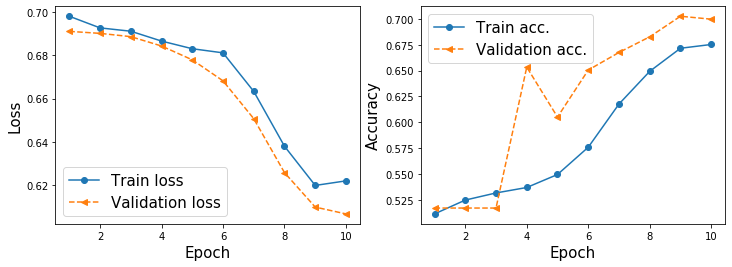

In [30]:
plot_train_valid(mlp_hist)

In [31]:
mlp_results = mlp_model.evaluate(tfidf_test.batch(test_size))
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*mlp_results))

1/1 [==============================] - 0s 44ms/step - loss: 0.6149 - accuracy: 0.6806
Test loss: 0.6149   Test Acc.: 0.6806


# Bidirectional RNN with LSTM layer.

In [32]:
embedding_dim = 26
vocab_size = rnn_input_shape + 2

bi_lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              name='embed-layer'),
    
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(100)), 

    tf.keras.layers.Dense(100, 
                          activation='relu'),
    
    tf.keras.layers.Dense(2, 
                          activation = 'softmax',
                          name = 'output')
])

bi_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed-layer (Embedding)      (None, None, 26)          728       
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               101600    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 122,630
Trainable params: 122,630
Non-trainable params: 0
_________________________________________________________________


In [0]:
bi_lstm_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [34]:
bi_lstm_hist = fitting_neural_network(bi_lstm_model, batch=8, epochs=10, ds_train_orig=rnn_train_orig, ds_valid_orig=rnn_valid_orig)

Train for 308.0 steps, validate for 132.0 steps
Epoch 1/10
308/308 [==============================] - 10s 33ms/step - loss: 0.6836 - accuracy: 0.5678 - val_loss: 0.5972 - val_accuracy: 0.6667
Epoch 2/10
308/308 [==============================] - 3s 10ms/step - loss: 0.5544 - accuracy: 0.7378 - val_loss: 0.4737 - val_accuracy: 0.7964
Epoch 3/10
308/308 [==============================] - 3s 10ms/step - loss: 0.4805 - accuracy: 0.7955 - val_loss: 0.4319 - val_accuracy: 0.8210
Epoch 4/10
308/308 [==============================] - 3s 10ms/step - loss: 0.4375 - accuracy: 0.8255 - val_loss: 0.4150 - val_accuracy: 0.8248
Epoch 5/10
308/308 [==============================] - 3s 10ms/step - loss: 0.4207 - accuracy: 0.8275 - val_loss: 0.4016 - val_accuracy: 0.8277
Epoch 6/10
308/308 [==============================] - 3s 10ms/step - loss: 0.3971 - accuracy: 0.8417 - val_loss: 0.3916 - val_accuracy: 0.8352
Epoch 7/10
308/308 [==============================] - 3s 10ms/step - loss: 0.3886 - accuracy:

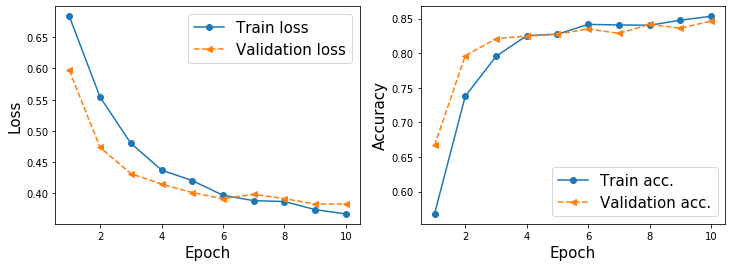

In [35]:
plot_train_valid(bi_lstm_hist)

In [36]:
# evaluate bi_lstm_model on the test data
bi_lstm_results = bi_lstm_model.evaluate(rnn_test.batch(test_size))
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*bi_lstm_results))

1/1 [==============================] - 0s 21ms/step - loss: 0.3864 - accuracy: 0.8535
Test loss: 0.3864   Test Acc.: 0.8535


# Bidirectional LSTM with multiple dropout layers.

In [38]:
embedding_dim = 26
vocab_size = rnn_input_shape + 2

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim),
    tf.keras.layers.Dense(100,
                          input_shape=(embedding_dim,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(100, 
                             return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(100,
                             return_sequences=False)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(2, 
                          activation='softmax')
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 26)          728       
_________________________________________________________________
dense_3 (Dense)              (None, None, 100)         2700      
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 200)         160800    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               240800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)              

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
model_hist = fitting_neural_network(model, batch=8, epochs=10, ds_train_orig=rnn_train_orig, ds_valid_orig=rnn_valid_orig)

Train for 308.0 steps, validate for 132.0 steps
Epoch 1/10
308/308 [==============================] - 10s 31ms/step - loss: 0.6260 - accuracy: 0.6372 - val_loss: 0.5027 - val_accuracy: 0.7831
Epoch 2/10
308/308 [==============================] - 5s 16ms/step - loss: 0.4727 - accuracy: 0.8024 - val_loss: 0.4240 - val_accuracy: 0.8134
Epoch 3/10
308/308 [==============================] - 5s 16ms/step - loss: 0.4255 - accuracy: 0.8263 - val_loss: 0.4019 - val_accuracy: 0.8428
Epoch 4/10
308/308 [==============================] - 5s 16ms/step - loss: 0.4073 - accuracy: 0.8421 - val_loss: 0.3894 - val_accuracy: 0.8381
Epoch 5/10
308/308 [==============================] - 5s 16ms/step - loss: 0.3955 - accuracy: 0.8433 - val_loss: 0.4069 - val_accuracy: 0.8220
Epoch 6/10
308/308 [==============================] - 5s 16ms/step - loss: 0.3888 - accuracy: 0.8486 - val_loss: 0.4008 - val_accuracy: 0.8305
Epoch 7/10
308/308 [==============================] - 5s 16ms/step - loss: 0.3788 - accuracy:

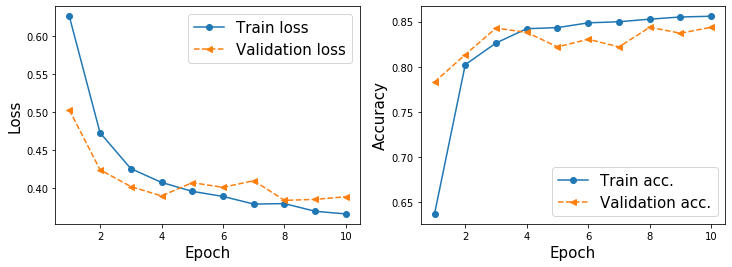

In [41]:
plot_train_valid(model_hist)

In [42]:
# evaluate model on the test data
model_results = model.evaluate(rnn_test.batch(test_size))
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*model_results))

1/1 [==============================] - 0s 31ms/step - loss: 0.3892 - accuracy: 0.8509
Test loss: 0.3892   Test Acc.: 0.8509
